In [1]:
import torch
from PIL import Image
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, DDIMScheduler
from diffusers.utils import load_image

controlnet = ControlNetModel.from_pretrained("DionTimmer/controlnet_qrcode-control_v1p_sd15",
                                             torch_dtype=torch.float16)

pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnet,
    safety_checker=None,
    torch_dtype=torch.float16
)

pipe.enable_xformers_memory_efficient_attention()
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

def resize_for_condition_image(input_image: Image, resolution: int):
    input_image = input_image.convert("RGB")
    W, H = input_image.size
    k = float(resolution) / min(H, W)
    H *= k
    W *= k
    H = int(round(H / 64.0)) * 64
    W = int(round(W / 64.0)) * 64
    img = input_image.resize((W, H), resample=Image.LANCZOS)
    return img


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /home/ai/miniconda3/envs/ai/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cuda118.so
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching in backup paths...
CUDA SETUP: CUDA runtime path found: /usr/local/cuda/lib64/libcudart.so
CUDA SETUP: Highest compute capability among GPUs detected: 8.0
CUDA SETUP: Detected CUDA version 118
CUDA SETUP: Loading binary /home/ai/miniconda3/envs/ai/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cuda118.so...


/home/ai/miniconda3/envs/ai/lib/python3.10/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: /home/ai/miniconda3/envs/ai did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/home/ai/miniconda3/envs/ai/lib/python3.10/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('vs/workbench/api/node/extensionHostProcess')}
  warn(msg)
/home/ai/miniconda3/envs/ai/lib/python3.10/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('module'), PosixPath('//matplotlib_inline.backend_inline')}
  warn(msg)
/home/ai/miniconda3/envs/ai/lib/python3.10/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: Found duplicate ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] files: {PosixPath

  0%|          | 0/800 [00:00<?, ?it/s]

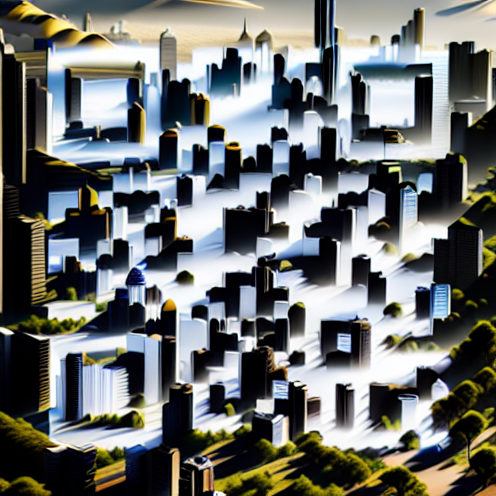

In [62]:
source_image = load_image("https://raw.githubusercontent.com/tetratorus/qr-diffusion/main/qrcode_H.png")

# init_image = load_image("https://www.thesprucepets.com/thmb/uQnGtOt9VQiML2oG2YzAmPErrHo=/5441x0/filters:no_upscale():strip_icc()/all-about-tabby-cats-552489-hero-a23a9118af8c477b914a0a1570d4f787.jpg")
condition_image = resize_for_condition_image(source_image, 768)
# init_image = resize_for_condition_image(init_image, 768)
generator = torch.manual_seed(123121231)
image = pipe(prompt="city scape, buildings, downtown architecture, 4K, Octane render, unreal engine, hyperrealistic",
             negative_prompt="ugly, disfigured, low quality, blurry, nsfw, QR code, QR", 
             image=source_image,
             width=500,
             height=500,
             guidance_scale=25,
             controlnet_conditioning_scale=2.8,
             generator=generator,
             num_inference_steps=800,
            )

image.images[0]